In [50]:
import collections
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [51]:
basedir = "/home/wulfebw/experiments/procgen_025/bigfish/"
key_to_filename = {
    "0.1": "drac_0.1.txt",
    "0.2": "drac_0.2.txt",
    "0.5": "drac_0.5.txt",
    "1.0": "drac_1.0.txt",
    "2.0": "drac_2.0.txt",
}
key_to_filepath = {k:os.path.join(basedir, fp) for (k,fp) in key_to_filename.items()}

In [52]:
def parse_rollout_line(line):
    matches = re.findall(r"[-+]?\d*\.\d+|\d+", line)
    _, ret, steps = matches
    ret = float(ret)
    steps = int(steps)
    return {"return":ret, "steps":steps}

def parse_rollout_text(filepath):
    rollout_info = collections.defaultdict(list)
    with open(filepath, "r", encoding="utf-8") as infile:
        for line in infile:
            info = parse_rollout_line(line)
            for k,v in info.items():
                rollout_info[k].append(v)
    return rollout_info

In [53]:
key_to_info = {}
for key, filepath in key_to_filepath.items():
    key_to_info[key] = parse_rollout_text(filepath)

In [54]:
key_to_df = {}
for key, info in key_to_info.items():
    key_to_df[key] = pd.DataFrame(info)


run key: 0.1
column: return, mean: 17.0133,  std: 16.2736
column: steps, mean: 510.0333,  std: 400.7812

run key: 0.2
column: return, mean: 13.3333,  std: 15.4665
column: steps, mean: 512.8333,  std: 466.4642

run key: 0.5
column: return, mean: 12.6600,  std: 14.0764
column: steps, mean: 537.1000,  std: 446.6449

run key: 1.0
column: return, mean: 12.5700,  std: 14.0276
column: steps, mean: 453.5100,  std: 354.3777

run key: 2.0
column: return, mean: 7.9500,  std: 12.5701
column: steps, mean: 356.2000,  std: 386.3237


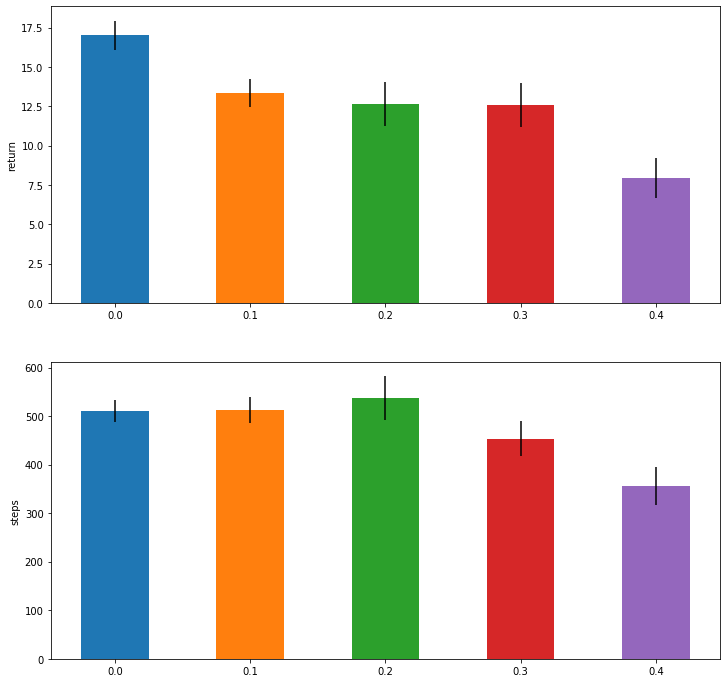

In [55]:
fig, axs = plt.subplots(2,1, figsize=(12,12))
for i, (key, df) in enumerate(key_to_df.items()):
    print(f"\nrun key: {key}")
    for j, column in enumerate(df.columns):
        num_samples = len(df[column])
        mean = df[column].mean()
        std = df[column].std()
        axs[j].bar(i * 0.1, mean, yerr=std / np.sqrt(num_samples), width=0.05, label=f"{key}")
        axs[j].set_ylabel(column)
        print(f"column: {column}, mean: {mean:.4f},  std: {std:.4f}")